In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Data Collection and Analysis

In [95]:
#Extracting data
df = pd.read_csv('diabetes.csv')

In [96]:
#get first five records of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
#get the shape of the dataset
df.shape

(768, 9)

In [98]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [99]:
#handle column with value 0
features = df.columns
cols = (df[features] == 0).sum()
print(cols)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [100]:
# replace the 0 values with Null for the selected columns
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [101]:
# check for the null values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [102]:
#Removing the rows that contain zero values from Insulin column:
df = df[df.Insulin > 0]
df.isnull().sum()

Pregnancies                 0
Glucose                     1
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [103]:
#check for the shape after removing the rows
df.shape

(394, 9)

In [104]:
#Replace the null values with the median of that column:

df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BMI'].fillna(df['BMI'].median(), inplace =True)

In [105]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.704545,111.484848,68.969697,27.208333,130.287879,31.740909,0.476280,28.291667
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


### Visualization of Target Variable

[Text(0, 0, 'Healthy'), Text(1, 0, 'Diabetic')]

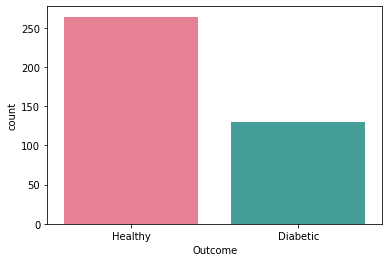

In [106]:
#Count values of outcomes
df['Outcome'].value_counts()
sns.countplot(x='Outcome',data=df)
ax = sns.countplot(x=df['Outcome'], data=df,palette="husl")
ax.set_xticklabels(["Healthy","Diabetic"])

### Distribution of features

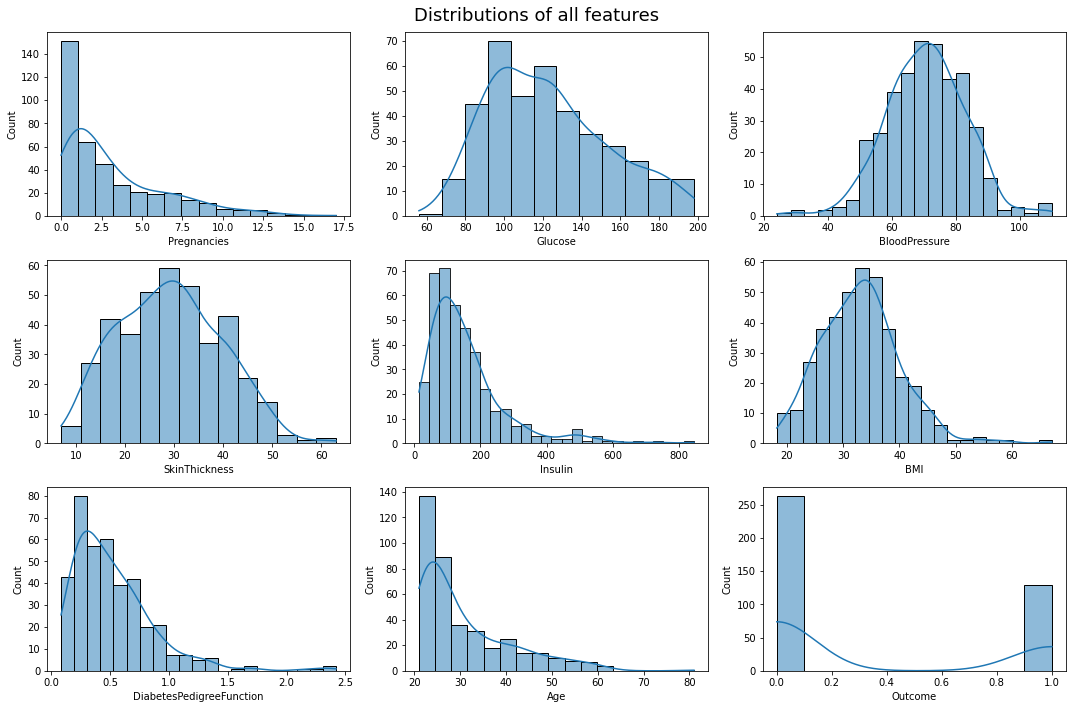

In [107]:
#Understanding the distribution of all the features in the dataset:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
for column, subplot in zip(df, ax.flatten()):
    sns.histplot(x = df[column], kde = True, ax = subplot)

fig.suptitle('Distributions of all features', fontsize = 18)
fig.tight_layout()
plt.show()

### BoxPlot to check for Outliers 

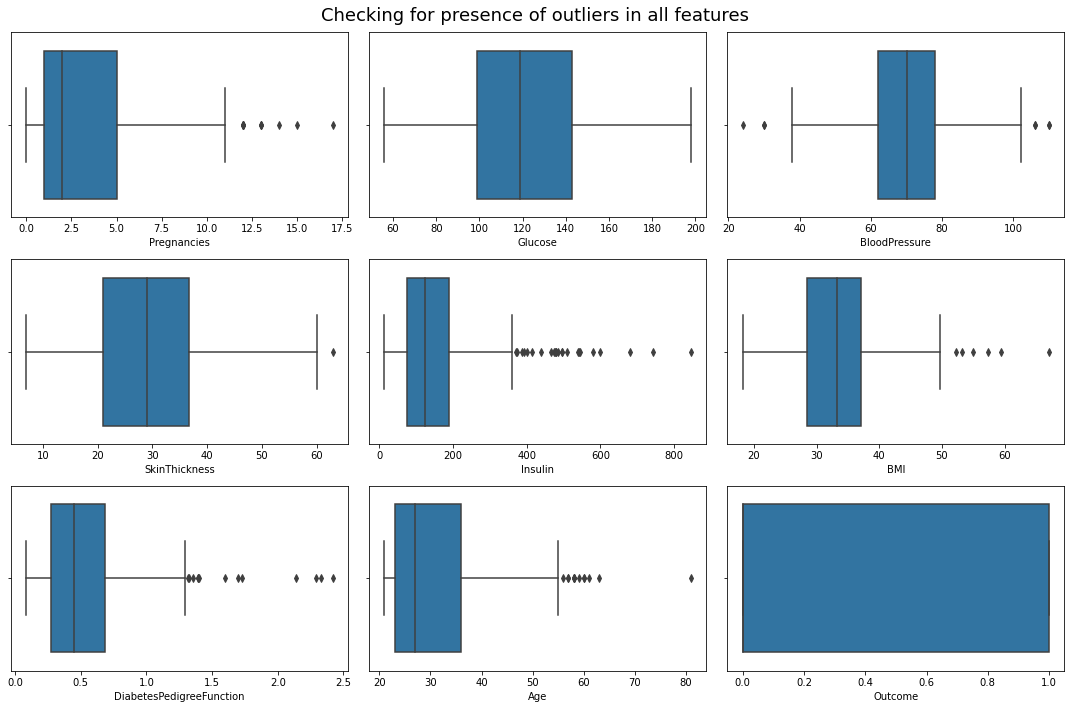

In [108]:
#Visualising the outliers in all the features:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
for column, subplot in zip(df, ax.flatten()):
    sns.boxplot(x = df[column], ax = subplot)

fig.suptitle('Checking for presence of outliers in all features', fontsize = 18)
fig.tight_layout()
plt.show()

### Correlation Matrix 

<AxesSubplot:>

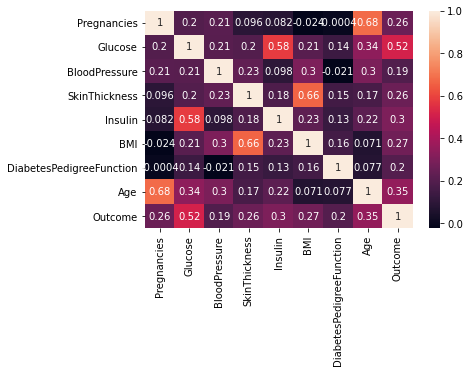

In [109]:
corr_mat=df.corr()
sns.heatmap(corr_mat, annot=True)
# Output depends majority on glucose

### Pair Plot 

In [ ]:
sns.pairplot(df, hue="Outcome",palette="husl")

### Separating the data and labels

In [ ]:
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

### Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

### Split Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### Model Building & Evaluation

##### SVM Model

In [ ]:
model=svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

In [ ]:
y_pred=model.predict(X_test)
accuracy_score(Y_test,y_pred)

In [ ]:
print(classification_report(Y_test,y_pred))

#### Random Forest Model 

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)

In [ ]:
Y_pred=classifier.predict(X_test)
accuracy_score(Y_test,Y_pred)

In [ ]:
print(classification_report(Y_test,Y_pred))

####  Logistic Regression Model

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,Y_train) 

In [ ]:
Y_pred=reg.predict(X_test)
accuracy_score(Y_test,Y_pred)

In [ ]:
print(classification_report(Y_test,Y_pred))

### Predictive System

In [ ]:
input_data = (2,80,92,0,0,37.6,0.191,30)
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshape)

In [ ]:
prediction = reg.predict(std_data)
print(prediction)

In [ ]:
# Creating a pickle file for the classifier
filename = 'diabetes-prediction-reg-model.pkl'
pickle.dump(reg, open(filename, 'wb'))